In [1]:
# Global imports and settings
%matplotlib inline
from preamble import *
plt.rcParams['figure.dpi'] = 100 # Use 300 for PDF, 100 for slides
HTML('''<style>html, body{overflow-y: visible !important} .CodeMirror{min-width:105% !important;} .rise-enabled .CodeMirror, .rise-enabled .output_subarea{font-size:140%; line-height:1.2; overflow: visible;} .output_subarea pre{width:110%}</style>''') # For slides

# Lecture 1: Introduction to Machine Learning
Joaquin Vanschoren, Eindhoven University of Technology

## Artificial Intelligence
1950s: Can computers be made to 'think'?
- automate intellectual tasks normally performed by humans
- encompasses learning, but also many other tasks (e.g. logic, planning,...)
- _symbolic AI_: programmed rules/algorithms for manipulating knowledge
    - Great for well-defined problems: chess, expert systems,...
    - Pervasively used today (e.g. chip design)
    - Hard for complex, fuzzy problems (e.g. images, text)

## Machine Learning
Are computers capable of learning and originality? Alan Turing: Yes!
- Learn to perform a task T given experience (examples) E, always improving according to some metric M
- New programming paradigm
    - System is _trained_ rather than explictly programmed
    - _Generalizes_ from examples to find rules (models) to act/predict
- As more data becomes available, more ambitious problems can be tackled

<img src="../images/00_ML.png" alt="ml" style="width: 500px;"/>

### Machine learning vs Statistics
* Both aim to make predictions of natural phenomena:
<img src="../images/00_stat1.png" alt="ml" style="width: 200px;"/>
* Statistics:
    - Help humans understand the world
    - Parametric: assume data is generated according to parametric model
<img src="../images/00_stat2.png" alt="ml" style="width: 200px;"/>
* Machine learning:
    - Automate a task entirely (partially _replace_ the human)
    - Assume that data generation process is unknown
    - Engineering-oriented, less (too little?) mathematical theory
<img src="../images/00_stat3.png" alt="ml" style="width: 200px;"/>
See Breiman (2001): Statistical modelling: The two cultures

### Machine Learning success stories
- Search engines (e.g. Google)
- Recommender systems (e.g. Netflix)
- Automatic translation (e.g. Google Translate)
- Speech understanding (e.g. Siri, Alexa)
- Game playing (e.g. AlphaGo)
- Self-driving cars
- Personalized medicine
- Progress in all sciences: Genetics, astronomy, chemistry, neurology, physics,..

# Types of machine learning
- __Supervised Learning__: learn a _model_ from labeled _training data_ (ground truth)
    - Given a new input _X_, predict the right output _y_
    - Given images of cats and dogs, predict whether a new image is a cat or a dog
- __Unsupervised Learning__: explore the structure of the data to extract meaningful information
    - Given inputs _X_, find which ones are special, similar, anomalous, ...
- __Semi-Supervised Learning__: learn a model from (few) labeled and (many) unlabeled examples
    - Unlabeled examples add information about which new examples are likely to occur
- __Reinforcement Learning__: develop an agent that improves its performance based on interactions with the environment 

Note: Practical ML systems can combine many types in one system.

## Supervised Machine Learning

- Learn a model from labeled training data, then make predictions
- Supervised: we know the correct/desired outcome (label)
- Subtypes: _classification_ (predict a class) and _regression_ (predict a numeric value)
- Most supervised algorithms that we will see can do both

<img src="../images/01_supervised.png" alt="ml" style="width: 60%;"/>

### Classification

- Predict a _class label_ (category), discrete and unordered
    - Can be _binary_ (e.g. spam/not spam) or _multi-class_ (e.g. letter recognition)
    - Many classifiers can return a _confidence_ per class
- The predictions of the model yield a _decision boundary_ separating the classes

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

# create a synthetic dataset
X, y = make_blobs(centers=2, cluster_std=2.5, random_state=8)

# Train classifiers
lr = LogisticRegression().fit(X, y)
svm = SVC(kernel='rbf', probability=True).fit(X, y)
knn = KNeighborsClassifier(n_neighbors=3).fit(X, y)

# Plotting
@interact
def plot_classifier(classifier=[lr,svm,knn]):
    fig, axes = plt.subplots(1, 2, figsize=(13, 5))    
    mglearn.tools.plot_2d_separator(
        classifier, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
    scores_image = mglearn.tools.plot_2d_scores(
        classifier, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')
    for ax in axes:
        mglearn.discrete_scatter(X[:, 0], X[:, 1], y,
                                 markers='o', ax=ax)
        ax.set_xlabel("Feature 0")
        ax.set_ylabel("Feature 1")
    cbar = plt.colorbar(scores_image, ax=axes.tolist())
    cbar.set_label('Predicted probability', rotation=270, labelpad=15)
    cbar.set_alpha(1)
    cbar.draw_all() 
    axes[0].legend(["Class 0", "Class 1"], ncol=4, loc=(.1, 1.1));

interactive(children=(Dropdown(description='classifier', options=(LogisticRegression(C=1.0, class_weight=None,…

#### Example: Flower classification
Classify types of Iris flowers (setosa, versicolor, or virginica)

<img src="../images/01_iris.jpeg" alt="ml" style="width: 75%;"/>


#### Representation: input features and labels
- Dataset can have any number of input features (variables)
    - Every example is a point in a (possibly high-dimensional) space
    
<img src="../images/01_terminology.png" alt="ml" style="float: left; width: 50%;"/>
<img src="../images/01_iris3d.png" alt="ml" style="float: left; width: 35%;"/>

### Regression
- Predict a continuous value, e.g. temperature
    - Target variable is numeric
    - Some algorithms can return a _confidence interval_
- Find the relationship between predictors and the target.
    - E.g. relationship between hours studied and final grade

In [10]:
from mglearn.datasets import make_wave
from mglearn.plot_helpers import cm2
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

X, y = make_wave(n_samples=60)
x = np.atleast_2d(np.linspace(-3, 3, 100)).T
lr = LinearRegression().fit(X, y)
ridge = BayesianRidge().fit(X, y)
gp = GaussianProcessRegressor(kernel=RBF(10, (1e-2, 1e2)), n_restarts_optimizer=9, alpha=0.1, normalize_y=True).fit(X, y)

@interact
def plot_regression(regressor=[lr, ridge, gp]):
    line = np.linspace(-3, 3, 100).reshape(-1, 1)
    plt.figure(figsize=(8, 8))
    plt.plot(X, y, 'o', c=cm2(0))
    if(regressor.__class__.__name__ == 'LinearRegression'):
        y_pred = regressor.predict(x)
    else:
        y_pred, sigma = regressor.predict(x, return_std=True)
        plt.fill(np.concatenate([x, x[::-1]]),
             np.concatenate([y_pred - 1.9600 * sigma,
                            (y_pred + 1.9600 * sigma)[::-1]]),
             alpha=.5, fc='b', ec='None', label='95% confidence interval')
        
    plt.plot(line, y_pred, 'b-')
    plt.xlabel("Input feature 1")
    plt.ylabel("Target")

interactive(children=(Dropdown(description='regressor', options=(LinearRegression(copy_X=True, fit_intercept=T…

## Unsupervised Machine Learning

- Unlabeled data, or data with unknown structure
- Explore the structure of the data to extract information
- Many types, we'll just discuss two.

### Clustering

- Organize information into meaningful subgroups (clusters)
- Objects in cluster share certain degree of similarity (and dissimilarity to other clusters)
- Example: distinguish different types of customers

In [11]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

n_samples = 1500

@interact
def plot_clusters(randomize=(1,100,1)):
    # Generate data
    X, y = make_blobs(n_samples=n_samples, cluster_std=[1.0, 1.5, 0.5], random_state=randomize)
    # Cluster
    y_pred = KMeans(n_clusters=3, random_state=randomize).fit_predict(X)
    # PLot
    plt.figure(figsize=(6, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y_pred)
    plt.title("Clusters")
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")


interactive(children=(IntSlider(value=50, description='randomize', min=1), Output()), _dom_classes=('widget-in…

### Dimensionality reduction

- Data can be very high-dimensional and difficult to understand, learn from, store,...
- Dimensionality reduction can compress the data into fewer dimensions, while retaining most of the information
- Contrary to feature selection, the new features lose their (original) meaning
- The new representation can be a lot easier to model (and visualize)

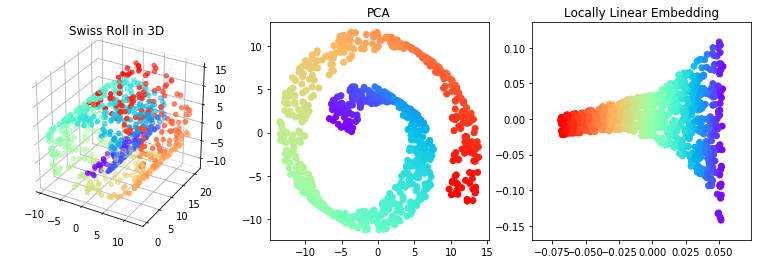

In [5]:
from sklearn.datasets.samples_generator import make_swiss_roll
from sklearn.manifold import locally_linear_embedding
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

X, color = make_swiss_roll(n_samples=800, random_state=123)

fig = plt.figure(figsize=plt.figaspect(0.3))
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.xaxis.pane.fill = False
ax1.yaxis.pane.fill = False
ax1.zaxis.pane.fill = False
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.rainbow)
plt.title('Swiss Roll in 3D')

ax2 = fig.add_subplot(1, 3, 2)
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
plt.scatter(X_spca[:, 0], X_spca[:, 1], c=color, cmap=plt.cm.rainbow)
plt.title('PCA');

ax3 = fig.add_subplot(1, 3, 3)
X_lle, err = locally_linear_embedding(X, n_neighbors=12, n_components=2)
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=color, cmap=plt.cm.rainbow)
plt.title('Locally Linear Embedding');

## Reinforcement learning

- Develop an agent that improves its performance based on interactions with the environment
    - Example: games like Chess, Go,...
- Search a (large) space of actions and states
- _Reward function_ defines how well a (series of) actions works
- Learn a series of actions (policy) that maximizes reward through exploration

<img src="../images/01_rl2.png" alt="ml" style="width: 60%;"/>


# Learning = Representation + evaluation + optimization
All machine learning algorithms consist of 3 components:
- **Representation**: A model must be represented in a formal language that the computer can handle
    - Defines the 'concepts' it can learn, the _hypothesis space_
    - E.g. a decision tree, neural network, set of annotated data points
- **Evaluation**: An _internal_ way to choose one hypothesis over the other
    - Objective function, scoring function, loss function
    - E.g. Difference between correct output and predictions
- **Optimization**: An _efficient_ way to search the hypothesis space
    - Start from simple hypothesis, extend (relax) if it doesn't fit the data
    - Defines speed of learning, number of optima,...
    - E.g. Gradient descent
    
A powerful/flexible model is only useful if it can also be optimized efficiently

### Example: neural networks
* Representation: (layered) neural network
    * Each connection has a _weight_ (a.k.a. model parameters)
    * Each node receives the weighted input values and emits a new value
* The _hypothesis space_ consists of the set of all weights
* The architecture, type of neurons, etc. are fixed
    * We call these _hyper-parameters_ (set by user, fixed during training)
    * They can also be learned (in an outer loop)

<img src="../images/08_nn_basic_arch.png" alt="ml" style="float: left; width: 40%;"/>
    


### Example: neural networks
* Representation: For illustration, consider the space of 2 model parameters
* Evaluation: A _loss function_ computes, for each set of parameters, how good the predictions are
    * _Estimated_ on a set of training data with the 'correct' predictions
    * We can't see the full surface, only evaluate specific sets of parameters
* Optimization: Find the optimal set of parameters
    * Usually a type of _search_ in the hypothesis space
    * Given a few initial evaluations, predict which parameters may be better

<img src="../images/00_ml3.png" alt="ml" style="float: left; width: 90%;"/>

# Generalization, Overfitting and Underfitting
* We _hope_ that the model can _generalize_ from the training data: make accurate predictions on unseen data.
* We can never be sure, only hope that we make the right assumptions.
    * We typically assume that new data will be similar to previous data
    * _Inductive bias_: assumptions that we put into the algorithm (everything except the training data itself)

#### Example: Dating 
<img src="../images/00_dating.png" alt="ml" style="width: 80%;"/>

- Can you find a simple rule that works? Is one better than others?
- What can we assume about the future? Nothing?
- What if there is noise / errors?
- What if there are factor you don't know about?

## Overfitting and Underfitting
* It's easy to build a complex model that is 100% accurate on the training data, but very bad on new data
* Overfitting: building a model that is _too complex for the amount of data_ that we have
    * You model peculiarities in your training data (noise, biases,...)
    * Solve by making model simpler (regularization), or getting more data
    * **Most algorithms have hyperparameters that allow regularization**
* Underfitting: building a model that is _too simple given the complexity of the data_
    * Use a more complex model
* There are techniques for detecting overfitting (e.g. bias-variance analysis). More about that later
* You can build _ensembles_ of many models to overcome both underfitting and overfitting 

* There is often a sweet spot that you need to find by optimizing the choice of algorithms and hyperparameters, or using more data.  
* Example: regression using polynomial functions

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1
X_test = np.linspace(0, 1, 100)
scores_x, scores_y = [], []

@interact
def plot_poly(degrees = (1, 16, 1)):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))    
    polynomial_features = PolynomialFeatures(degree=degrees,
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    ax1.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    ax1.plot(X_test, true_fun(X_test), label="True function")
    ax1.scatter(X, y, edgecolor='b', s=20, label="Samples")
    ax1.set_xlabel("x")
    ax1.set_ylabel("y")
    ax1.set_xlim((0, 1))
    ax1.set_ylim((-2, 2))
    ax1.legend(loc="best")
    ax1.set_title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees, -scores.mean(), scores.std()))
    scores_x.append(degrees)
    scores_y.append(-scores.mean())

    # Plot scores
    ax2.scatter(scores_x, scores_y, edgecolor='b', s=20)
    order = np.argsort(scores_x)
    ax2.plot(np.array(scores_x)[order], np.array(scores_y)[order])
    ax2.set_xlim((0, 16))
    ax2.set_ylim((10**-2, 10**11))
    ax2.set_xlabel("degree")
    ax2.set_ylabel("error")
    ax2.set_yscale("log")
    
    fig.show()

interactive(children=(IntSlider(value=8, description='degrees', max=16, min=1), Output()), _dom_classes=('widg…

## Model selection
- Next to the (internal) loss function, we need an (external) evaluation function
    - Feedback signal: are we actually learning the right thing? 
    - Are we under/overfitting?
    - More freely chosen to fit the application. Loss functions have constraints (e.g. differentiable)
    - Needed to choose between algorithms (or different hyper-parameter settings)

- Data needs to be split into _training_ and _test_ sets
    - Optimize model parameters on the training set, evaluate on independent test set
    - To optimize hyperparameters as well, set aside part of training set as a _validation_ set

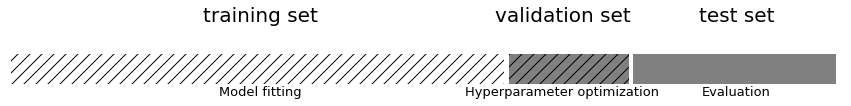

In [7]:
import mglearn
mglearn.plots.plot_threefold_split()

Overview

<img src="../images/00_hyperparams.png" alt="ml" style="width: 50%;"/>

## Only generalization counts!
* Never evaluate your final models on the training data, except for:
    * Tracking whether the optimizer converges (learning curves)
    * Detecting under/overfitting:
        * Low training and test score: underfitting
        * High training score, low test score: overfitting
* Always keep a completely independent test set
* Avoid data leakage:
    * Never optimize hyperparameter settings on the test data
    * Never choose preprocessing techniques based on the test data
* On small datasets, use multiple train-test splits to avoid bias
    * E.g. Use cross-validation (see later)

# Data (problem) representation    
- Algorithm needs to correctly transform the inputs to the right outputs
- A lot depends on how we present the data to the algorithm
    - Transform the data to a more useful representation (a.k.a. _encoding_ or _embedding_)
    - Can be done end-to-end (e.g. deep learning) or by first 'preprocessing' the data
<img src="../images/00_representation.png" alt="ml" style="width: 800px;"/>

## Feature engineering
* Most machine learning techniques require humans to build a good representation of the data  
    * Sometimes data is naturally structured (e.g. medical tests)
* Nothing beats domain knowledge (when available) to get a good representation
    * E.g. Iris data: leaf length/width separate the classes well
* Feature engineering is often necessary to get the best results
    * Feature selection, dimensionality reduction, scaling, ...
    
<img src="../images/01_iris3d.png" alt="ml" style="width: 35%;"/>

## Learning data transformations end-to-end
* For unstructured data (e.g. images, text), it's hard to extract good features
* Deep learning: learn your own representation (embedding) of the data 
    * Through multiple layers of representation (e.g. layers of neurons)
    * Each layer transforms the data a bit, based on what reduces the error
    
<img src="../images/00_layers.png" alt="ml" style="width: 60%"/>

#### Example: digit classification
- Input pixels go in, each layer transforms them to an increasingly informative representation for the given task
- Often less intuitive for humans
<img src="../images/00_layers2.png" alt="ml" style="width: 60%"/>

## Curse of dimensionality
* Intuition fails in high dimensions: 
    - Randomly sample points in an n-dimensional space (e.g. a unit hypercube)
    - The more dimensions you have, the more sparse the space becomes
    - Distances between any two points will become almost identical
    - Almost all points become outliers at the edge of the space

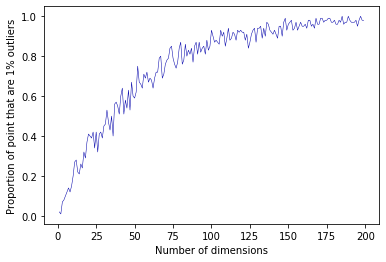

In [8]:
# Code originally by Peter Norvig 
def sample(d=2, N=100):
    return [[np.random.uniform(0., 1.) for i in range(d)] for _ in range(N)]

def corner_count(points):
    return np.mean([any([(d < .01 or d > .99) for d in p]) for p in points])

def go(Ds=range(1,200)):
    plt.plot(Ds, [corner_count(sample(d)) for d in Ds])
    plt.xlabel("Number of dimensions")
    plt.ylabel("Proportion of point that are 1% outliers")
    
go()

#### Practical consequences
* For every dimension (feature) you add, you need exponentially more data to avoid sparseness
* Affects any algorithm that is based on distances (e.g. kNN, SVM, kernel-based methods, tree-based methods,...)
* Blessing of non-uniformity: on many applications, the data lives in a very small subspace
* You can drastically improve performance by selecting features or using lower-dimensional data representations

## More data can beat a cleverer algorithm (but you need both)
* More data reduces the chance of overfitting
* Less sparse data reduces the curse of dimensionality
* _Non-parametric_ models: number of model parameters grows with the amount of data
    - Tree-based techniques, k-Nearest neighbors, SVM,...
    - They can learn any model given sufficient data (but can get stuck in local minima)
* _Parametric_ (fixed size) models: fixed number of model parameters
    - Linear models, Neural networks,...
    - Can be given a huge number of parameters to benefit from more data 
    - Deep learning models can have millions of weights, learn almost any function.
* The bottleneck is moving from data to compute/scalability

# Building machine learning systems
A typical machine learning system has multiple components:
    
- Preprocessing: Raw data is rarely ideal for learning
    - Feature scaling: bring values in same range
    - Encoding: make categorical features numeric
    - Discretization: make numeric features categorical
    - Label imbalance correction (e.g. downsampling)
    - Feature selection: remove uninteresting/correlated features
    - Dimensionality reduction can also make data easier to learn
    - Using pre-learned embeddings (e.g. word-to-vector, image-to-vector)
    

- Learning and evaluation
    - Every algorithm has its own biases
    - No single algorithm is always best
    - _Model selection_ compares and selects the best models
        - Different algorithms, different hyperparameter settings
    - Split data in training, validation, and test sets
    
- Prediction
    - Final optimized model can be used for prediction
    - Expected performance is performance measured on _independent_ test set

- Together they form a _workflow_ of _pipeline_
- You need to optimize pipelines continuously
    - _Concept drift_: the phenomenon you are modelling can change over time
    - _Feedback_: your model's predictions may change future data 

<img src="../images/01_ml_systems_2.png" alt="ml" style="width: 80%"/>